In [434]:
#Definimos la clase mapa
class Mapa:
    def __init__(self, neighbors, location):
        self.neighbors = neighbors
        self.location = location

In [435]:
#Instanciamos los diferentes puntos del mapa

neighbors = {
 'A': [('Z',75), ('T',118), ('S',140)],
 'B': [('F',211), ('P',101), ('G',90), ('U',85)],
 'C': [('D',120), ('R',146), ('P',138)],
 'D': [('M',75), ('C',120)],
 'E': [('H',86)],
 'F': [('S',99), ('B',211)],
 'G': [('B',90)],
 'H': [('U',98), ('E',86)],
 'I': [('N',87), ('V',92)],
 'L': [('T',111), ('M',70)],
 'M': [('L',70), ('D',75)],
 'N': [('I',87)],
 'O': [('Z',71), ('S',151)],
 'P': [('R',97), ('C',138), ('B',101)],
 'R': [('S',80), ('C',146), ('P',97)],
 'S': [('A',140), ('O',151), ('F',99), ('R',80)],
 'T': [('A',118), ('L',111)],
 'U': [('B',85), ('V',142), ('H',98)],
 'V': [('U',142), ('I',92)],
 'Z': [('O',71), ('A',75)]}

location = {
 'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293),
 'F': (305, 449),
 'G': (375, 270),
 'H': (534, 350),
 'I': (473, 506),
 'L': (165, 379),
 'M': (168, 339),
 'N': (406, 537),
 'O': (131, 571),
 'P': (320, 368),
 'R': (233, 410),
 'S': (207, 457),
 'T': (94, 410),
 'U': (456, 350),
 'V': (509, 444),
 'Z': (108, 531)}

terreno = Mapa(neighbors, location)

In [436]:
#Clase abstracta

from abc import ABC, abstractmethod

class SearchProblem(ABC):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    @abstractmethod
    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        pass

    @abstractmethod
    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        pass

    @abstractmethod
    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        pass

    @abstractmethod
    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con
        la accion action, asumiendo un costo c para llegar hasta state1.
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        pass


In [437]:
#Clase hija que implementa todos los métodos abstractos

class MapSearchProblem(SearchProblem):
    def __init__(self, initial, goal, mapa):
        """El constructor recibe  el estado inicial, el estado objetivo y un mapa (de clase Mapa)"""
        super().__init__(initial,goal)
        self.map = mapa

    def actions(self, state):
        """Retorna las acciones ejecutables desde ciudad state.
        El resultado es una lista de strings tipo 'goCity'.
        Por ejemplo, en el mapa de Romania, las acciones desde Arad serian:
         ['goZ', 'goT', 'goS']"""
        neighbors = []
        acciones = []
        neighbors = self.map.neighbors[state]
        for acc in range(len(neighbors)):
            acciones.append('go' + neighbors[acc][0])
        return acciones

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada desde ciudad state.
        La accion debe ser alguna de self.actions(state)
        Por ejemplo, en el mapa de Romania, el resultado de aplicar la accion 'goZerind'
        desde el estado 'Arad' seria 'Zerind'"""
        newState = action[2:]   #el ultimo caracter de la accion es el nombre de la ciudad destino
        return newState

    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state)

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con la accion action
        El costo del camino para llegar a state1 es c. El costo de la accion debe ser
        extraido de self.map."""
        actionCost = 0;
        destStates = self.map.neighbors[state1] #estado destino, state2
        for acc in range(len(destStates)):
            if (destStates[acc][0] == state2):
                actionCost = destStates[acc][1]
                break
        return c + actionCost;

In [438]:
#Clase para representar un nodo en el árbol de búsqueda

class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de arbol de busqueda, derivado del nodo parent y accion action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __lt__(self, other):
        """Método para comparar dos nodos usando el costo del camino.
        Se utiliza para la ordenación en la cola de prioridad.
        """
        return self.path_cost < other.path_cost

    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next))

    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]

    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    def __eq__(self, other):
        "Este metodo se ejecuta cuando se compara nodos. Devuelve True cuando los estados son iguales"
        "(representan el mismo estado)"
        return isinstance(other, Node) and self.state == other.state

In [439]:
#Clase para implementar la frontera, esta es ordenada por una funcion de costo

import heapq
class FrontierPQ:
    "Una Frontera ordenada por una funcion de costo (Priority Queue)"

    def __init__(self, initial, costfn=lambda node: node.path_cost):
        "Inicializa la Frontera con un nodo inicial y una funcion de costo especificada"
        "(por defecto es el costo de camino)."
        self.heap   = []
        self.states = {}
        self.costfn = costfn
        self.add(initial)

    def add(self, node):
        "Agrega un nodo a la frontera."
        cost = self.costfn(node)
        heapq.heappush(self.heap, (cost, node))
        self.states[node.state] = node

    def pop(self):
        "Remueve y retorna el nodo con minimo costo."
        (cost, node) = heapq.heappop(self.heap)
        self.states.pop(node.state, None) # remove state
        return node

    def replace(self, node):
        "node reemplaza al nodo de la Fontera que tiene el mismo estado que node."
        if node.state not in self:
            raise ValueError('{} no tiene nada que reemplazar'.format(node.state))
        for (i, (cost, old_node)) in enumerate(self.heap):
            if old_node.state == node.state:
                self.heap[i] = (self.costfn(node), node)
                heapq._siftdown(self.heap, 0, i)
                return

    def __contains__(self, state): return state in self.states

    def __len__(self): return len(self.heap)

In [440]:
#Definimos el algoritmo general de búsqueda

def best_first_graph_search(problem, f):
    """Busca el objetivo expandiendo el nodo de la frontera con el menor valor de la funcion f. Memoriza estados visitados
    Antes de llamar a este algoritmo hay que especificar La funcion f(node). Si f es node.depth tenemos Busqueda en Amplitud;
    si f es node.path_cost tenemos Busqueda  de Costo Uniforme. Si f es una heurística tenemos Busqueda Voraz;
    Si f es node.path_cost + heuristica(node) tenemos A* """

    frontier = FrontierPQ( Node(problem.initial), f )  # frontera tipo cola de prioridad ordenada por f
    explored = set()     # memoria de estados visitados - set sin parametros devuelve un conjunto vacío, donde los elementos no se pueden repetir
    expanded_nodes = 0   # contador de nodos expandidos
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node, expanded_nodes
        explored.add(node.state)
        expanded_nodes = expanded_nodes + 1
        for action in problem.actions(node.state):
            child = node.child_node(problem, action)
            if child.state not in explored and child.state not in frontier:
                frontier.add(child)
            elif child.state in frontier:
                incumbent = frontier.states[child.state]
                if f(child) < f(incumbent):
                    frontier.replace(child)

In [441]:
#Definimos el algoritmo de búsqueda A* que llama al método general con una función de costo determinada por el costo del camino al nodo actual más una heurística
def astar_search(problem, heuristic):
    f = lambda node: node.path_cost + heuristic(node, problem)
    return best_first_graph_search(problem, f)

In [442]:
import math

def nullheuristic(node, problem):  # heurística nula (A* se convierte en busqueda de costo uniforme)
    return 0

def h1(node, problem):
    "Distancia en linea recta desde la posicion de node hasta la posicion del Objetivo (problem.goal)"
    loc_node = problem.map.location[node.state]
    loc_goal = problem.map.location[problem.goal]
    return math.sqrt( math.pow(loc_goal[0] - loc_node[0], 2) + math.pow(loc_goal[1] - loc_node[1], 2) )

def h2(node, problem):
    "Distancia de Manhattan desde la posición de node hasta la posición del Objetivo (problem.goal)"
    loc_node = problem.map.location[node.state]
    loc_goal = problem.map.location[problem.goal]
    return abs(loc_goal[0] - loc_node[0]) + abs(loc_goal[1] - loc_node[1])

def h3(node, problem):
    "Distancia de Chebyshev desde la posición de node hasta la posición del Objetivo (problem.goal)"
    loc_node = problem.map.location[node.state]
    loc_goal = problem.map.location[problem.goal]
    return max(abs(loc_goal[0] - loc_node[0]), abs(loc_goal[1] - loc_node[1]))

In [443]:
p = MapSearchProblem('C', 'P', terreno)   # problema de busqueda

node, num_exp_nodes = astar_search(p, nullheuristic)
print( 'Solucion obtenida con A* y heuristica nula (UCS): {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )

node, num_exp_nodes = astar_search(p, h1)
print( 'Solucion obtenida con A* y heuristica h1: {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )

node, num_exp_nodes = astar_search(p, h2)
print( 'Solucion obtenida con A* y heuristica h2: {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )

node, num_exp_nodes = astar_search(p, h3)
print( 'Solucion obtenida con A* y heuristica h3: {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )

Solucion obtenida con A* y heuristica nula (UCS): ['goP']. Nodos expandidos = 2
Solucion obtenida con A* y heuristica h1: ['goP']. Nodos expandidos = 1
Solucion obtenida con A* y heuristica h2: ['goP']. Nodos expandidos = 1
Solucion obtenida con A* y heuristica h3: ['goP']. Nodos expandidos = 1


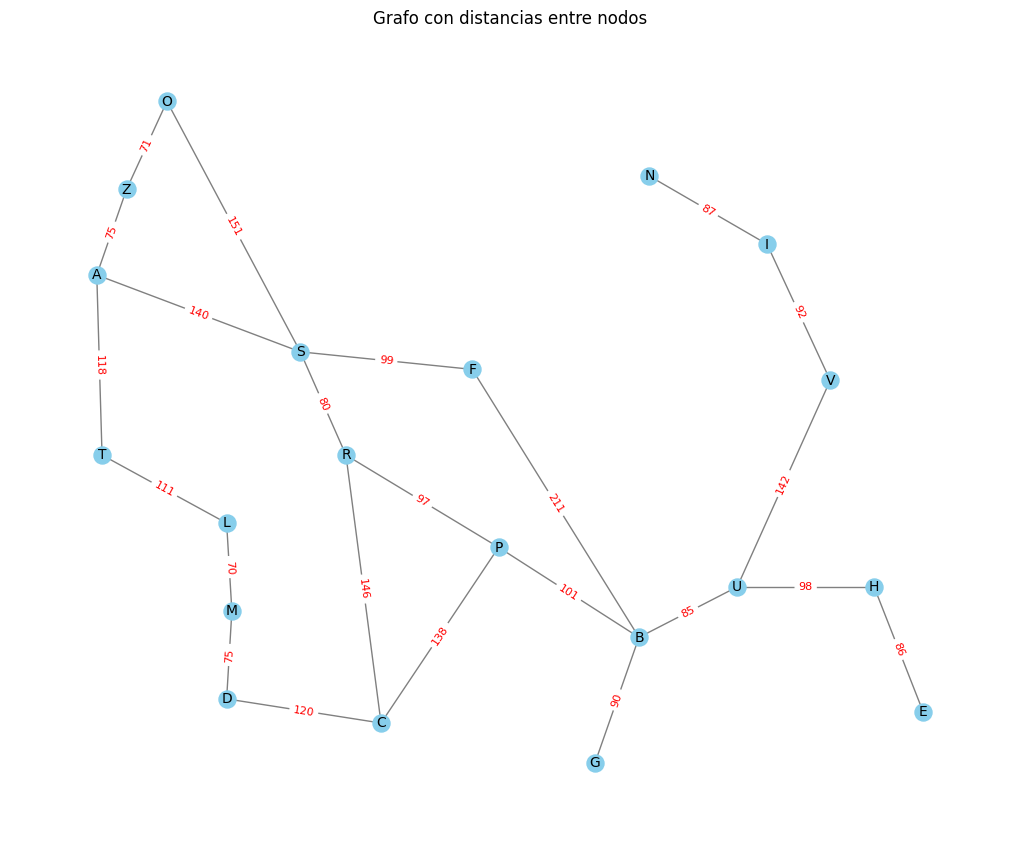

In [444]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo vacío
G = nx.Graph()

# Añadir los nodos y las aristas al grafo con pesos
for node1, neighbors_list in neighbors.items():
    for neighbor, distance in neighbors_list:
        G.add_edge(node1, neighbor, weight=distance)  # Agregar peso como atributo 'weight'

# Crear un diccionario de posiciones para los nodos usando las coordenadas de `location`
pos = location

# Dibujar el grafo
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
nx.draw(
    G,              # El grafo que quieres dibujar
    pos=pos,        # Las posiciones de los nodos (coordenadas)
    with_labels=True,  # Mostrar etiquetas (nombres de los nodos)
    node_size=150,  # Tamaño de los nodos
    node_color="skyblue",  # Color de los nodos
    font_size=10,   # Tamaño de la fuente de las etiquetas
    font_color="black",  # Color del texto
    edge_color="gray"  # Color de las aristas
)

# Obtener los pesos de las aristas (distancias)
edge_labels = nx.get_edge_attributes(G, 'weight')

# Dibujar las etiquetas de las aristas (distancias)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Mostrar el grafo
plt.title("Grafo con distancias entre nodos")
plt.show()



In [445]:
# Función para pintar el grafo con nodos resaltados
def draw_graph_with_highlighted_node(G, pos, highlighted_node=None, colores=None, etiquetas=None, lista=None):
    clear_output(wait=True)  # Limpiar la salida de la celda
    plt.figure(figsize=(12, 9))

    # Dibujar el grafo
    nx.draw(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

    for i, node in enumerate(highlighted_node):
        if(node):
          nx.draw_networkx_nodes(G, pos, nodelist=node, node_size=250, node_color=colores[i])

    if etiquetas and colores:
        for color, etiqueta in zip(colores, etiquetas):
            plt.scatter([], [], color=color, label=etiqueta, s=200)  # Elemento invisible para la leyenda
        plt.legend(title="Equipos", loc="upper left", fontsize=9)



    # Mostrar el grafo
    plt.title("Grafo con Nodo Resaltado")
    plt.show()

In [446]:
def generaPath(solution):
  path = []
  for action in solution:
    node_name = action[2:]
    path.append(node_name)
  return path

In [447]:
def generaSolution(inicio,fin):
  p = MapSearchProblem(inicio, fin, terreno)
  node, _ = astar_search(p, h1)
  return node.solution()

In [448]:

def extract_vips(terreno, helipads, teams, vips):
    """
    Algoritmo principal para extraer VIPs desde el terreno.
    """
    vip_extracted = set()
    vip_paths = []

    while len(vip_extracted) < len(vips):
        for i, team in enumerate(teams):
            # Encontrar el VIP más cercano al equipo
            nearest_vip = None
            shortest_path = None #nodo objetivo
            for vip in vips:
                if vip in vip_extracted:
                    continue

                node_vip, num_exp_nodes_vip = astar_search(MapSearchProblem(team, vip, terreno), h1)
                if node and (shortest_path is None or node.path_cost < shortest_path.path_cost):
                    nearest_vip = vip
                    shortest_path = node_vip


            # Si encontramos un VIP, escoltarlo al helipuerto más cercano
            if nearest_vip:
                team_path = shortest_path
                nearest_helipad = None
                shortest_helipad_path = None #nodo objetivo

                for helipad in helipads:
                    node_helipad, num_exp_nodes_helipad = astar_search(MapSearchProblem(nearest_vip, helipad, terreno), h1)
                    if node_helipad and (shortest_helipad_path is None or node_helipad.path_cost < shortest_helipad_path.path_cost):
                        nearest_helipad = helipad
                        shortest_helipad_path = node_helipad

                # Actualizar la posición del equipo y registrar el VIP como extraído
                if shortest_helipad_path:
                    ruta = []
                    ruta.append(team)
                    ruta.extend(generaPath(team_path.solution()+shortest_helipad_path.solution()))
                    vip_paths.append(ruta)
                    vip_extracted.add(nearest_vip)
                    teams[i] = nearest_helipad


    return vip_paths

In [449]:
def calcular_distancia_total(rutas, vecinos):
    # Inicializa la distancia total a 0
    distancia_total = 0

    # Recorre cada ruta
    for ruta in rutas:
        # Recorre los nodos consecutivos en la ruta
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]

            # Busca la distancia entre los nodos consecutivos
            for vecino, distancia in vecinos.get(nodo_actual, []):
                if vecino == nodo_siguiente:
                    distancia_total += distancia
                    break

    return distancia_total

In [450]:
from itertools import zip_longest

colores = ['red','green','yellow']
etiquetas = ['Equipo1', 'Equipo2','Equipo3'] #escribir trayectoria de los equipos
helipads = ['O','E','N'] #helipuertos
teams = ['O','E','N'] #equipos
vips = ['T','D','G'] #vips


listas = extract_vips(terreno,helipads,teams.copy(),vips)

print(f"La distancia total recorrida por todas las rutas es: {calcular_distancia_total(listas, neighbors)}")

for ruta, lista in enumerate(listas):
  print("Ruta " + str(ruta) + ": " + str(lista))

La distancia total recorrida por todas las rutas es: 3209
Ruta 0: ['O', 'S', 'R', 'P', 'B', 'G', 'B', 'U', 'H', 'E']
Ruta 1: ['E', 'H', 'U', 'B', 'P', 'C', 'D', 'C', 'R', 'S', 'O']
Ruta 2: ['N', 'I', 'V', 'U', 'B', 'P', 'R', 'S', 'A', 'T', 'A', 'Z', 'O']


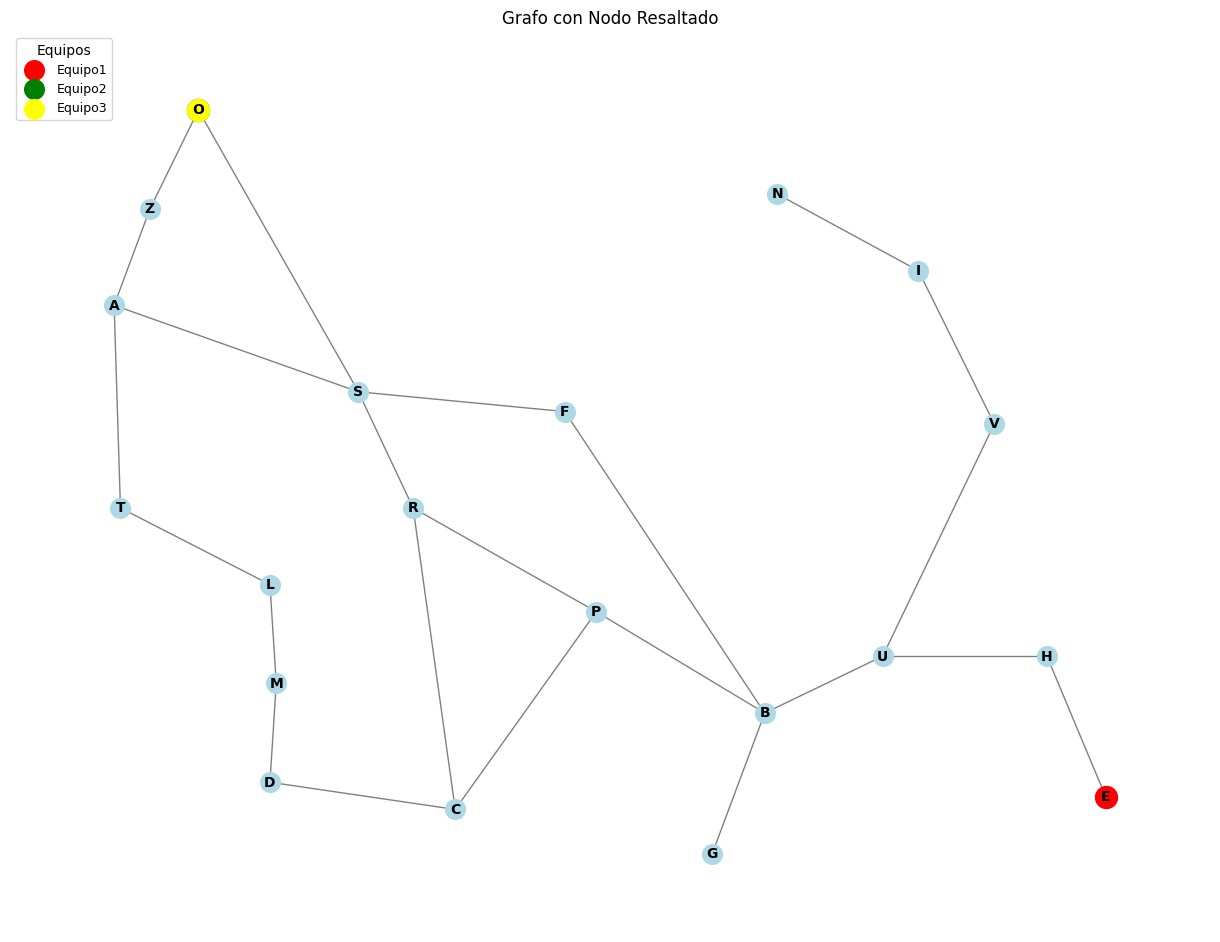

In [451]:
# Encontrar la longitud máxima
longitud_maxima = max(len(lista) for lista in listas)

# Extender cada lista al tamaño máximo, completando con su último elemento
listas_alineadas = [
    lista + [lista[-1]] * (longitud_maxima - len(lista)) if lista else []
    for lista in listas
]

for ruta, lista in enumerate(listas_alineadas):
  print("Ruta " + str(ruta) + ": " + str(lista))


for _, pasos in enumerate(zip_longest(*listas_alineadas, fillvalue=None)):
  print(pasos)
  draw_graph_with_highlighted_node(G, pos, highlighted_node=pasos, colores=colores, etiquetas=etiquetas)
  time.sleep(0.65)  # Esperar un segundo antes de mostrar el siguiente nodo
